# Orders - Multivariate Regression of  the `review_score`

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [14]:
orders = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/tp_datos/2-ecommerce/data/tablon_primario.csv")
orders.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,...,tiempo_de_espera_pronosticado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,...,15.544063,0.0,0,0,4,1,1,29.99,8.72,18.063837
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,...,19.137766,0.0,0,0,4,1,1,118.70,22.76,856.292580
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,...,26.639711,0.0,1,0,5,1,1,159.90,19.22,514.130333
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,...,26.188819,0.0,1,0,5,1,1,45.00,27.20,1822.800366
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,...,12.112049,0.0,1,0,5,1,1,19.90,8.72,30.174037


Let's recall our simple analysis from yesterday's exercise: 

¿ A qué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

In [15]:
from olist.preprocess import whitespace_remover_and_columns
orders = whitespace_remover_and_columns(orders)

In [16]:
round(orders.corr(numeric_only=True),2)

,Unnamed: 0,time_delta,tiempo_de_espera,tiempo_de_espera_pronosticado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distance_seller_customer
Unnamed: 0,1.00,0.00,0.00,0.01,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
time_delta,0.00,1.00,1.00,0.38,0.70,-0.23,0.31,-0.33,-0.02,-0.04,0.06,0.17,0.39
tiempo_de_espera,0.00,1.00,1.00,0.39,0.70,-0.23,0.31,-0.33,-0.02,-0.04,0.06,0.17,0.39
tiempo_de_espera_pronosticado,0.01,0.38,0.39,1.00,0.01,-0.05,0.03,-0.05,0.02,0.02,0.08,0.24,0.51
real_vs_esperado,0.00,0.70,0.70,0.01,1.00,-0.16,0.28,-0.27,-0.01,-0.02,0.02,0.02,0.07
es_cinco_estrellas,0.00,-0.23,-0.23,-0.05,-0.16,1.00,-0.40,0.79,-0.07,-0.07,-0.01,-0.06,-0.06
es_una_estrella,0.00,0.31,0.31,0.03,0.28,-0.40,1.00,-0.81,0.12,0.10,0.04,0.08,0.04
review_score,-0.00,-0.33,-0.33,-0.05,-0.27,0.79,-0.81,1.00,-0.12,-0.12,-0.03,-0.09,-0.06
num_de_produc,0.00,-0.02,-0.02,0.02,-0.01,-0.07,0.12,-0.12,1.00,0.29,0.15,0.44,-0.02
vendedores_unicos,0.00,-0.04,-0.04,0.02,-0.02,-0.07,0.10,-0.12,0.29,1.00,0.04,0.13,-0.01


<Axes: >

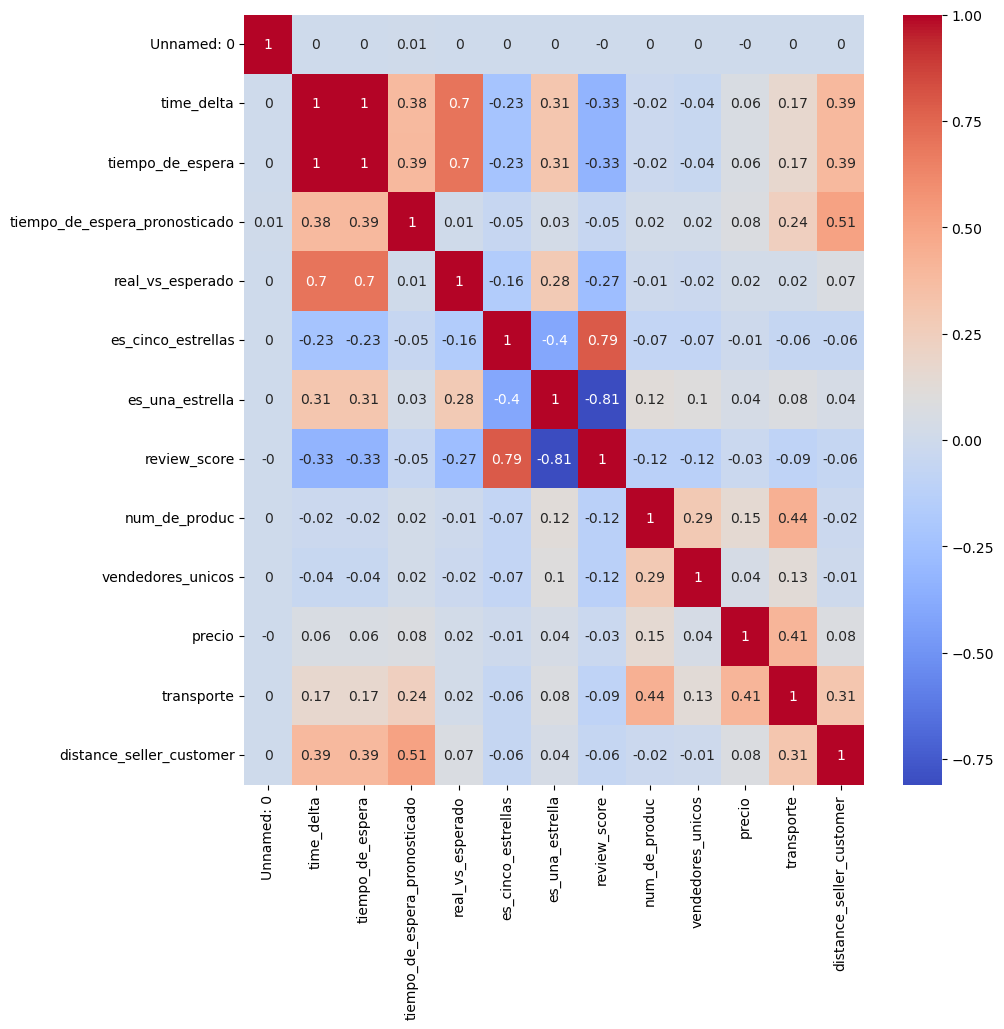

In [17]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    round(orders.corr(numeric_only=True),2), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

___

## 1 - Regresión Univariada

Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

___

## ***Modelo 1***:

In [18]:
import statsmodels.formula.api as smf
modelo1 = smf.ols(formula='review_score ~ tiempo_de_espera', data=orders)
modelo1 = modelo1.fit()
print(modelo1.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:33:40   Log-Likelihood:            -1.5439e+05
No. Observations:               95857   AIC:                         3.088e+05
Df Residuals:                   95855   BIC:                         3.088e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

##### → **R-squared** = 0.112. Indica que solamente el 11.2% de la variación de la variable dependiente (b1 - tiempo_de_espera) es explicada por la variable independiente (b0 - review_score). El otro 88.8% de la variación de la variable dependiente (b1 - tiempo_de_espera) es explicada por otras variables que no están incluidas en el modelo.

##### → **Coeficientes de regresión individuales**. El coeficiente negativo de tiempo_de_espera indica que a medida que aumenta el tiempo_de_espera, el review_score tiende a disminuir. El coeficiente de tiempo_de_espera es -0.0454, lo que significa que por cada aumento de 1 en tiempo_de_espera, el review_score disminuye en 0.0454.
 
##### → **Valores 't'**. El estadístico t (tomándolo en valor absoluto) para este coeficiente es muy grande. Es de -109.747, lo que indica que la estimación del coeficiente es altamente significativa. Un valor t grande significa que la relación entre la variable independiente (b0 - review_score) y la variable dependiente (b1 - tiempo_de_espera) es muy poco probable que sea debida al azar. Cuanto más grande sea el valor t, más fuerte es la evidencia en contra de la hipótesis nula (que el coeficiente es igual a cero)

##### → **Valores 'p'**. El p-value para este coeficiente es muy pequeño. Es de 0.000, lo que indica que la probabilidad de observar una estadísica t tan grande por casualidad es muy baja.

##### → **Intervalos de confianza del 95%**. Para este coeficiente el intervalo de confianza del 95% es de -0.046 a -0.045. No incluye cero, lo que apoya aún más la conclusión de que tiempo_de_espera tiene un efecto negativo significativo sobre review_score.

___

## ***Modelo 2***:

In [19]:
import statsmodels.formula.api as smf
modelo2 = smf.ols(formula='review_score ~ real_vs_esperado', data=orders)
modelo2 = modelo2.fit()
print(modelo2.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:33:40   Log-Likelihood:            -1.5637e+05
No. Observations:               95857   AIC:                         3.127e+05
Df Residuals:                   95855   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

##### ***→ R-squared*** = 0.074. Indica que solamente el 7.4% de la variación de la variable dependiente (b1 - real_vs_esperado) es explicada por la variable independiente (b0 - review_score). El otro 92.6% de la variación de la variable dependiente (b1 - real_vs_esperado) es explicada por otras variables que no están incluidas en el modelo.

##### ***→ Coeficientes de regresión individuales***. El coeficiente negativo de real_vs_esperado indica que a medida que aumenta el tiempo reaL_vs_esperado, el review_score tiende a disminuir. El coeficiente de real_vs_esperado es -0.0752, lo que significa que por cada aumento de 1 en real_vs_esperado, el review_score disminuye en 0.0752.
 
##### ***→ Valores 't'***. El estadístico t (tomándolo en valor absoluto) para este coeficiente es muy grande. Es de -87.644, lo que indica que la estimación del coeficiente es altamente significativa. Un valor t grande significa que la relación entre la variable independiente (b0 - review_score) y la variable dependiente (b1 - real_vs_esperado) es muy poco probable que sea debida al azar. Cuanto más grande sea el valor t, más fuerte es la evidencia en contra de la hipótesis nula (que el coeficiente es igual a cero)

##### ***→ Valores 'p'***. El p-value para este coeficiente es muy pequeño. Es de 0.000, lo que indica que la probabilidad de observar una estadísica t tan grande por casualidad es muy baja.

##### ***→ Intervalos de confianza del 95%***. Para este coeficiente el intervalo de confianza del 95% es de -0.077 a -0.073. No incluye cero, lo que apoya aún más la conclusión de que real_vs_esperado tiene un efecto negativo significativo sobre review_score.

___

## 2 - Multivariate regression

## ***Modelo 3***:

In [20]:
modelo3= smf.ols(formula='review_score ~ tiempo_de_espera + real_vs_esperado', data=orders)
modelo3 = modelo3.fit()
print(modelo3.summary())
coef_real_vs_esperado = modelo3.params['real_vs_esperado']
print(f"El impacto en review_score de agregar un día más de real_vs_esperado es {coef_real_vs_esperado:.4f}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6193.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:33:40   Log-Likelihood:            -1.5424e+05
No. Observations:               95857   AIC:                         3.085e+05
Df Residuals:                   95854   BIC:                         3.085e+05
Df Model:                           2                                         
Covariance Type:            nonrobust  

In [21]:
print(f"El coeficiente para tiempo_de_espera es {modelo3.params['tiempo_de_espera']:.4f}")
print(f"El coeficiente para real_vs_esperado es {modelo3.params['real_vs_esperado']:.4f}")

El coeficiente para tiempo_de_espera es -0.0383
El coeficiente para real_vs_esperado es -0.0205


### ***Responder***
### ***¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? ¿Cuál es más explicativa de `review_score`,   `tiempo_de_espera` o `real_vs_esperado` ?***

##### → El impacto de review_score agregrandole un día más de real_vs_esperado manteniendo todo lo otro constante es de -0.0205. Es decir, por cada aumento de 1 en real_vs_esperado, el review_score disminuye en 0.0205.

##### → La más explicativa de review_score es tiempo_de_espera, ya que tiene un coeficiente mayor que real_vs_esperado.


Nuestra regresión multivariante nos permite aislar el impacto de una característica, mientras controlamos el efecto de otras características. Estos nuevos coeficientes se denominan **`coeficientes de correlación parcial`**.

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

___

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

## ***Modelo 4***:

¿Que variables considerar?

In [22]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'time_delta', 'tiempo_de_espera',
       'tiempo_de_espera_pronosticado', 'real_vs_esperado',
       'es_cinco_estrellas', 'es_una_estrella', 'review_score',
       'num_de_produc', 'vendedores_unicos', 'precio', 'transporte',
       'distance_seller_customer'],
      dtype='object')

In [23]:
# select features
features = ['tiempo_de_espera', 'real_vs_esperado', 'num_de_produc', 'vendedores_unicos', 'precio', 'transporte', 'distance_seller_customer']

In [24]:
from scipy.stats import zscore
import pandas as pd

columnas_para_transformar = ['tiempo_de_espera', 'real_vs_esperado', 'num_de_produc', 'vendedores_unicos', 'precio', 'transporte', 'distance_seller_customer']
orders_zscore = orders[columnas_para_transformar].apply(zscore)
orders[columnas_para_transformar] = orders_zscore
orders

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,...,tiempo_de_espera_pronosticado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,...,15.544063,-0.161781,0,0,4,-0.264603,-0.112554,-0.513784,-0.652018,-0.978986
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,...,19.137766,-0.161781,0,0,4,-0.264603,-0.112554,-0.086646,0.000447,0.429687
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,...,26.639711,-0.161781,1,0,5,-0.264603,-0.112554,0.111732,-0.164063,-0.145329
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,...,26.188819,-0.161781,1,0,5,-0.264603,-0.112554,-0.441511,0.206782,2.053937
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,...,12.112049,-0.161781,1,0,5,-0.264603,-0.112554,-0.562367,-0.652018,-0.958634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95852,95852,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,...,18.587442,-0.161781,1,0,5,-0.264603,-0.112554,-0.311506,-0.449401,-0.892578
95853,95853,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,...,23.459051,-0.161781,0,0,4,-0.264603,-0.112554,0.183957,-0.123168,-0.212604
95854,95854,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.0,...,30.384225,-0.161781,1,0,5,-0.264603,-0.112554,0.333655,1.964347,0.617501
95855,95855,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,...,37.105243,-0.161781,0,0,2,1.601496,-0.112554,1.075116,2.715332,-0.387298


Crear el `modelo4`

In [25]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ tiempo_de_espera + real_vs_esperado + num_de_produc + vendedores_unicos + precio + transporte + distance_seller_customer'

In [26]:
modelo4 = smf.ols(formula=formula, data=orders)
modelo4 = modelo4.fit()
print(modelo4.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2323.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:33:40   Log-Likelihood:            -1.5255e+05
No. Observations:               95857   AIC:                         3.051e+05
Df Residuals:                   95849   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust  

____

### ***→ ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)***

In [47]:
coeficientes_absolutos = abs(modelo4.params.drop('Intercept'))
coef_sorted = coeficientes_absolutos.sort_values(ascending=False)

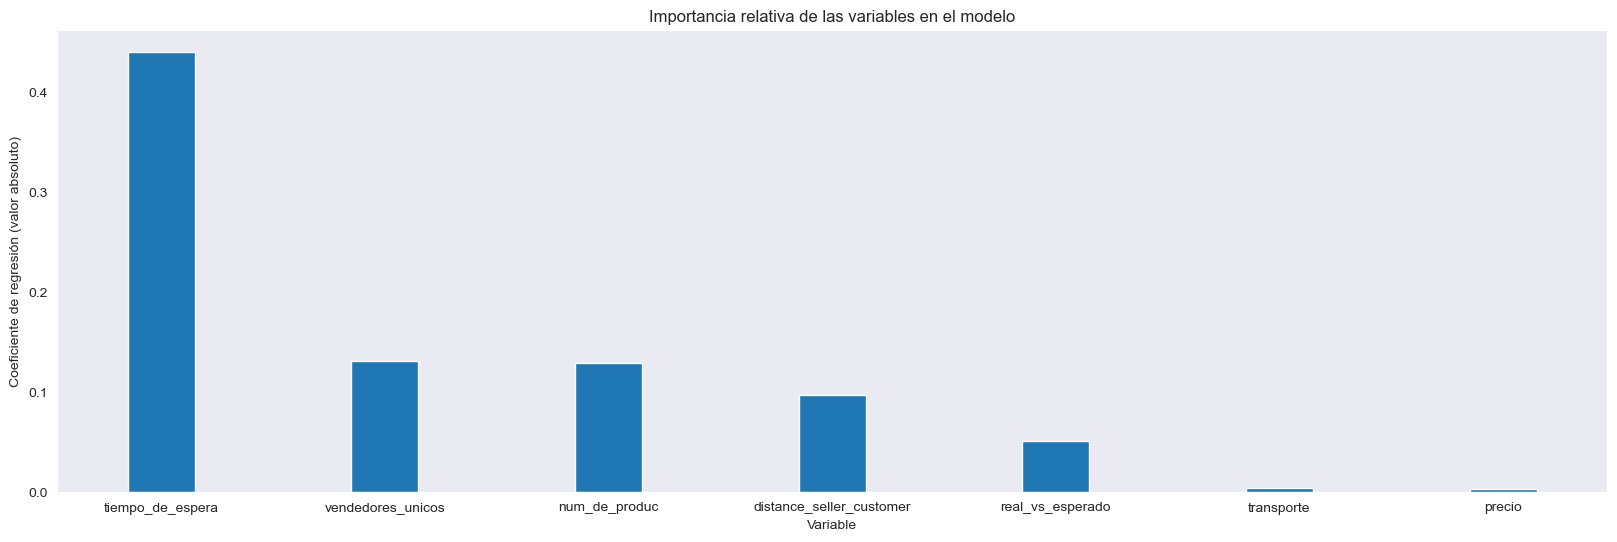

In [54]:
plt.figure(figsize=(20, 6))
plt.bar(coef_sorted.index, coef_sorted, width=0.3)
plt.xlabel('Variable')
plt.ylabel('Coeficiente de regresión (valor absoluto)')
plt.title('Importancia relativa de las variables en el modelo')
plt.grid(False)
plt.show()

### ***→ ¿Cómo ha cambiado el rendimiento general de la regresión?***

##### El rendimiento general de la regresión se puede evaluar a través del valor R-squared. En este caso, el valor R-squared aumentó de 0.114 a 0.145 (del modelo3 al modelo4), lo que indica que el modelo 4 explica un poco más la variación de la variable dependiente (review_score) que el modelo 3.

##### Lo que sucede aquí es que el 14.5% de la variación en review_score se puede explicar por las variaciones combinadas en tiempo_de_espera, real_vs_esperado, distancia, freight_value, precio y volumen. El otro 85.5% de la variación en review_score se puede explicar por otras variables que no están incluidas en el modelo.

### ***→ ¿Es esta regresión estadísticamente significativa?***

##### Para determinar si una regresión es estadísticamente significativa debemos mirar Prob (F-statistic). En este caso, el valor de Prob (F-statistic) es 0.000, lo que indica que el modelo es estadísticamente significativo. Si el modelo no fuera estadísticamente significativo, no podríamos confiar en los resultados de los coeficientes individuales.

In [28]:
print(modelo4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2323.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:33:40   Log-Likelihood:            -1.5255e+05
No. Observations:               95857   AIC:                         3.051e+05
Df Residuals:                   95849   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### ***→ ¿Cual es la variable que más impacto tiene?***

##### Para ver cual es la variable que más impacto tiene, debemos hacer foco en los coeficientes de regresión individuales. En este caso, la variable que más impacto tiene sobre review_score es tiempo_de_espera, ya que tiene el coeficiente (en términos absolutos) más alto. El mismo es de -0.04401, lo que significa que por cada aumento de 1 en tiempo_de_espera, el review_score disminuye en 0.4401.

### ***→ ¿Qué pasa con productos y vendedores cuando hay más?***

##### Para analizar qué es lo que ocurre con productos y vendedores cuando hay más, también debemos observar los coeficientes de regresión individuales (en este caso de num_de_produc y vendedores_unicos). Como ambos coeficientes son negativos, eso significa que a medida que el número de productos o vendedores aumenta, el review_score decrece.

##### El coeficiente de num_de_produc es de -0.1297, lo que significa que por cada aumento de 1 en num_de_produc, el review_score disminuye en 0.1297. El coeficiente de vendedores_unicos es de -0.1313, lo que significa que por cada aumento de 1 en vendedores_unicos, el review_score disminuye en 0.1313.


### ***→ ¿Qué pasa con la distancia?***

##### Para analizar qué es lo que ocurre con la distancia_seller_customer, también debemos observar el coeficiente de regresión individual. Como el coeficiente es positivo, eso significa que a medida que la distancia aumenta, el review_score aumenta. El coeficiente de distancia_seller_customer es de 0.0970, lo que significa que por cada aumento de 1 en distancia_seller_customer, el review_score aumenta en 0.0970.

### ***→ ¿Qué pasa con precio y transporte?***

##### Para analizar qué es lo que ocurre con precio y transporte, también debemos observar los coeficientes de regresión individuales (en este caso de precio y freight_value). Como ambos coeficientes tienen signos opuestos, eso significa que a medida que el precio aumenta, el review_score disminuye, mientras que a medida que el freight_value aumenta, el review_score aumenta.

##### El coeficiente de precio es de -0.0029, lo que significa que por cada aumento de 1 en precio, el review_score disminuye en 0.0029. En cambio, El coeficiente de freight_value es de 0.0043, lo que significa que por cada aumento de 1 en freight_value, el review_score aumenta en 0.0043.



### ***→ ¿Qué pasa con F-statistics y p-value?***

##### El valor de F-statistic mide la significancia general del modelo de regresión. Un valor alto de F-statistic indica que el modelo es estadísticamente significativo, lo que significa que al menos una de las variables independientes está relacionada con la variable dependiente. En este caso, el valor de F-statistic es 2323, lo que indica que el modelo de regresión es estadísticamente significativo.


##### El P>|t| (p-value) es una medida de la significancia estadística de cada variable independiente en el modelo de regresión. Un valor alto de P>|t| (mayor a 0.05) indica que la variable independiente no es estadísticamente significativa en la predicción de la variable dependiente.

##### Por un lado, el P>|t| de precio es 0.489 y el de transporte es 0.385, lo que significa que estas variables no son estadísticamente significativas en la predicción de la variable dependiente (review_score) ya que sus valores de p son mayores a 0.05. Esto sugiere que el precio y el costo de transporte no tienen un impacto significativo en la calificación de revisión.

##### Por el otro, el P>|t| del resto de las variables es 0.00 (menor a 0.05), lo que significa que son estadísticamente significativas en la predicción de la variable dependiente (review_score). Esto sugiere que el tiempo de espera, el tiempo real vs esperado, la distancia, el número de productos y el número de vendedores tienen un impacto significativo en el review_score.

### ***→ Analizar R cuadrado***

##### El valor R-cuadrado es una medida de la bondad de ajuste del modelo de regresión. Indica la proporción de la variación total de la variable dependiente que es explicada por el modelo. En este caso, el valor R-cuadrado es de 0.145, lo que significa que el modelo explica el 14.5% de la variación total de la variable dependiente (review_score).

##### Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.

##### Un valor R-cuadrado bajo indica que el modelo no explica bien la variación de la variable dependiente y que puede haber otras variables importantes que no se están considerando en el modelo. 

##### Sin embargo, es importante tener en cuenta que un valor R-cuadrado alto no garantiza que el modelo sea bueno, ya que puede haber otras variables que afecten la variable dependiente y que no se estén considerando en el modelo. Por lo tanto, es importante evaluar otros aspectos del modelo, como los coeficientes de regresión individuales y los valores p, para determinar si el modelo es adecuado para los datos.


___

## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

In [65]:
n = len(modelo4.resid)
residuos = modelo4.predict() - orders['review_score']
residuos

0        0.306348
1        0.195736
2       -0.657087
3       -0.618111
4       -0.432611
           ...   
95852   -0.674814
95853   -0.259423
95854   -1.294416
95855    1.728967
95856   -0.556736
Name: review_score, Length: 95857, dtype: float64

In [64]:
residuos = residuos.std() / orders['review_score'].std() * 1 / (n ** 0.5)
residuos

0.002986507654213605

Computar rmse

In [31]:
from sklearn.metrics import mean_squared_error

y_true = orders['review_score']
y_pred = modelo4.predict()

rms = mean_squared_error(y_true, y_pred, squared=False)
print(f"El RMS es {rms:.4f}")

El RMS es 1.1883


Plotear los resultados

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_67407/3815806901.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuos, shade=True)


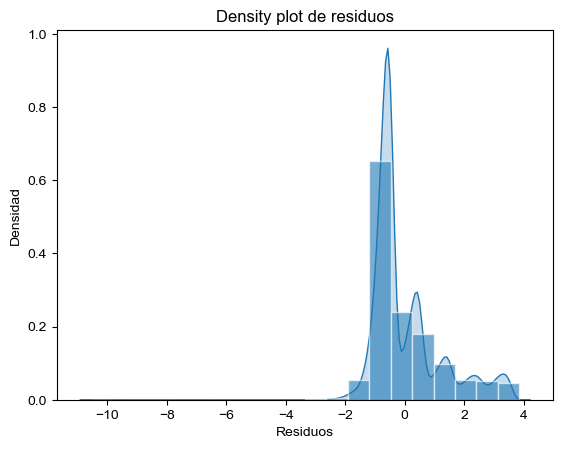

In [32]:
import seaborn as sns

residuos = modelo4.predict() - orders['review_score']

sns.kdeplot(residuos, shade=True)
sns.set_style("darkgrid")
plt.hist(residuos, bins=20, alpha=0.6, density=True)
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.title('Density plot de residuos')
plt.show()

### ***→ ¿Por qué la trama residual tiene una forma tan extraña?***

##### La trama residual puede tener una forma extraña si el modelo de regresión no se ajusta bien a los datos. Esto puede deberse a que el modelo no tiene en cuenta todas las variables importantes que afectan a la variable dependiente (b1), o porque el modelo no es lo suficientemente flexible para capturar la complejidad entre las variables independientes (b0) y la variable dependiente (b1).

Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_67407/2519338779.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predicted_review_score, shade=False, label='predicted_review_score')
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_67407/2519338779.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(review_score, shade=False, label='review_score')


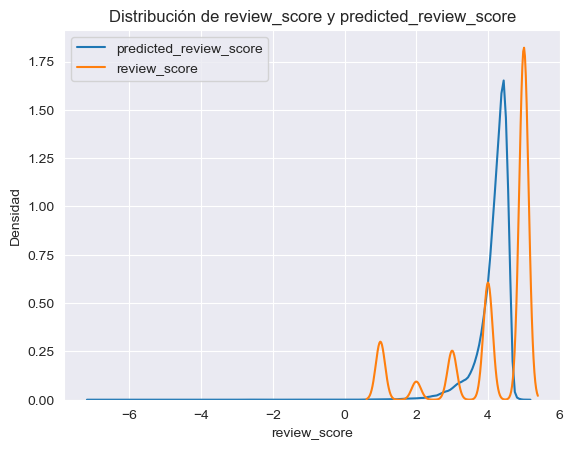

In [33]:
import seaborn as sns

review_score = orders['review_score']
predicted_review_score = modelo4.predict()

sns.kdeplot(predicted_review_score, shade=False, label='predicted_review_score')
sns.kdeplot(review_score, shade=False, label='review_score')
sns.set_style("darkgrid")
plt.xlabel('review_score')
plt.ylabel('Densidad')
plt.title('Distribución de review_score y predicted_review_score')
plt.legend()
plt.show()

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.